# MADAD Sarra - ABDELKADER Mohamed - BERNAROU Eliott - CHADOIN Alfio - NOUAR Manelle

# DataCamp 

### Majeure Data - IA

# Reconnaissance Faciale

#### Modèles utilisés :
- KNN => dataset de landmarks + labels
- MLP (pas de SLP car problème multiclasse et données non linéairement séparable) => dataset de landmarks + labels
- ANN & CNN => images + labels


La reconnaissance d’émotions est un secteur en plein essor qui intéresse de nombreux scientifiques du fait de ses difficultés et challenges qui font qu’elle demeure à ce jour un problème non résolu; 
Le domaine est vaste, c’est pourquoi, dans le cadre de ce projet, nous allons nous limiter aux émotions dites basiques (du modèle d’Ekman), à savoir : joie, colère, dégoût, tristesse, peur et surprise auxquelles s’ajoute l’absence d’émotion (« neutre »).
Pour parvenir à concevoir un système de reconnaissance d’émotions, de manière générale avec une approche de machine learning, il est souvent convenu de procéder en suivant le pipeline :

(a) input images => (b) face detection and landmarks => (c) feature extraction => (d) classification

Notre base de données contient des images de différentes personnes exprimant ces émotions basiques.

Nous partons donc sur un pattern simple :

- Observation des données : landmarks (dataframe) et images (plus loin pour ANN et CNN)
- Séparation des données : données brutes et labels associés
- Normalisation des données
- Réduction de dimensions (PCA) car certains points sont fortement corrélés 
- Modèles : KNN, MLP puis ANN et CNN

On passe les images pour ANN et CNN et le dataset de landmarks pour KNN et MLP.

On peut faire une cascade de classifieurs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pylab import *
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot

# CHARGEMENT DES DONNES :

## On charge le dataset de landmarks :

In [2]:
dataframe = pd.read_csv("C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Data Camp/training_data.csv", sep =",")

#Séparation des observations et des labels
X = dataframe.iloc[:, 4:] #toutes les lignes de la 5ème colonne à la fin (on compte le 0)
y = dataframe.iloc[:, 1] #toutes les lignes de la 2ème colonne à la fin
z = dataframe.iloc[:, 2]

X = np.array(X)
y = np.array(y)

In [3]:
print("Nous avons 1286 observations de 136 features.\n", X.shape )
print("\n")
print("Nous avons 7 classes différentes :\n", set(y))
print("\n")
print("Nous avons 7 émotions différentes :\n", set(z))
print("\n")
print("On peut compter le nombre d'observation par classe :\n", np.unique(y, return_counts=True))

Nous avons 1286 observations de 136 features.
 (1286, 136)


Nous avons 7 classes différentes :
 {1, 2, 3, 5, 6, 7, 8}


Nous avons 7 émotions différentes :
 {'Angry', 'Sad', 'Fearful', 'neutral', 'Happy', 'Suprised', 'Disgusted'}


On peut compter le nombre d'observation par classe :
 (array([1, 2, 3, 5, 6, 7, 8], dtype=int64), array([173, 171, 194, 198, 181, 189, 180], dtype=int64))


In [4]:
dataframe

,id,target,targetName,subject,x_0,x_1,x_2,x_3,x_4,x_5,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,08_213_0699,8,Fearful,213,439.3,437.6,441.8,450.7,467.2,494.6,...,551.9,544.3,527.1,522.4,524.4,523.3,529.7,527.2,528.8,526.6
1,03_390_3151,3,Sad,390,382.3,383.8,387.2,392.9,406.8,432.2,...,564.7,556.0,538.4,532.5,535.1,532.9,539.4,552.4,555.4,552.6
2,06_290_8569,6,Suprised,290,335.4,334.5,340.4,351.2,367.4,391.7,...,550.7,544.1,524.0,511.3,510.8,509.6,519.8,525.3,526.7,526.0
3,08_201_9378,8,Fearful,201,413.5,413.4,418.7,429.8,447.9,474.6,...,589.4,581.6,562.9,556.8,558.9,557.5,565.7,568.6,570.1,567.2
4,01_346_4226,1,neutral,346,400.3,401.8,407.0,414.7,428.2,450.9,...,549.2,542.7,527.6,528.7,529.6,527.3,525.3,528.2,529.6,528.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,08_362_0441,8,Fearful,362,375.0,375.4,379.7,386.0,396.5,414.9,...,555.7,545.8,524.0,515.1,516.2,514.8,523.2,535.9,537.3,535.4
1282,06_322_1917,6,Suprised,322,394.3,393.8,400.1,412.5,429.5,453.2,...,602.9,595.4,575.8,569.2,569.8,568.5,573.1,580.8,582.4,580.9
1283,06_256_4937,6,Suprised,256,423.8,424.8,433.7,446.7,463.7,487.7,...,593.1,587.6,571.1,558.1,557.4,556.2,565.0,567.3,568.7,568.4
1284,01_272_6686,1,neutral,272,352.8,358.4,366.5,377.7,396.7,426.2,...,513.9,512.0,500.0,490.5,489.5,485.7,488.2,487.2,491.1,492.0


## On charge les images :

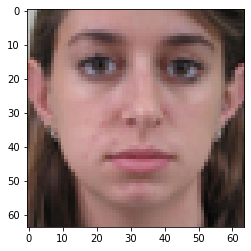

In [5]:
from IPython.display import display, Image
from PIL import Image

#redimension de l'image
def loadNewImage(file, left, right, up, down, dec):
  image = Image.open(file)
  image = image.crop((left-dec, up-dec, right+dec, down+dec))
  image = image.resize((64, 64))
  return(np.array(image))

listImage = [] #elle contient les 1286 observations/images
idImage = dataframe["id"].values #on récupère le nom de l'image 
for i in range(len(idImage)):
    left, right, up, down = (dataframe.loc[i, 'x_0'], dataframe.loc[i, 'x_16'], dataframe.loc[i, 'y_19'], dataframe.loc[i, 'y_8'])
    fileToImage = str("C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Data Camp/training_img" + "/" + idImage[i] + ".jpg")
    #image = Image.open(fileToImage)
    image = loadNewImage(fileToImage, left, right, up, down, 40)
    listImage.append(image)

listImage = np.array(listImage) / 255.0 #on normalise
plt.imshow(listImage[13]) #on peut choisir l'image à afficher ou boucler pour toutes les afficher
plt.show()

In [6]:
X_image_array = np.copy(listImage) #liste d'image
X #données associées aux images
Y_image_array = np.copy(y) #label des images

print(shape(X_image_array)) #1286 images de 64 x 64
print(shape(Y_image_array)) #les labels des 1286 images
#print(X_image_array[1])

(1286, 64, 64, 3)
(1286,)


In [7]:
shape(X_image_array[1])

(64, 64, 3)

## On normalise nos données + réduction de dimensions (car landmarks corrélés) :

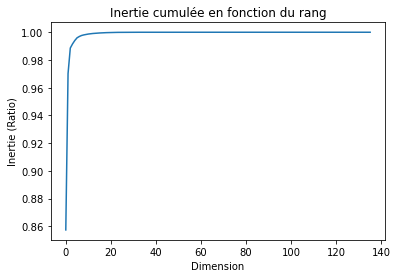

In [8]:
#Normalisation des données : landmarks
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

#Réduction de dimensions
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

plt.figure()
plt.plot(np.array(range(X_pca.shape[1])), np.cumsum(pca.explained_variance_ratio_))
plt.title("Inertie cumulée en fonction du rang")
plt.xlabel("Dimension")
plt.ylabel("Inertie (Ratio)")
plt.show()

## On ne peut pas faire des réductions de dimensions sur les images puisque la liste d'image n'est pas un tableau en 2D.

### On garde donc une dizaine de features dans le dataset de landmarks.

# KNN (sur le dataset de landmarks, normalisé et réduit)

    Accuracy  Nombre de voisins K
0   0.274611                    1
1   0.316062                    2
2   0.295337                    3
3   0.331606                    4
4   0.341969                    5
5   0.321244                    6
6   0.323834                    7
7   0.316062                    8
8   0.329016                    9
9   0.326425                   10
10  0.305699                   11
11  0.318653                   12
12  0.318653                   13
13  0.321244                   14
14  0.308290                   15
15  0.321244                   16
16  0.316062                   17
17  0.305699                   18
18  0.310881                   19
19  0.326425                   20
20  0.329016                   21
21  0.326425                   22
22  0.336788                   23
23  0.339378                   24
24  0.334197                   25
25  0.341969                   26
26  0.334197                   27
27  0.334197                   28
28  0.336788  

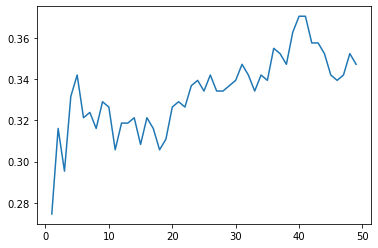

Matrice de confusion :
 [[14  4 10  5  4 10 13]
 [ 4 13  5  5  2 12 12]
 [ 6  4  4 15  0 16 19]
 [ 2  0  5 49  0 10  2]
 [ 4  2  5  8 13  7 17]
 [ 4  9  0 12  0 21  3]
 [ 4  2  3  4 10  4  9]]


In [9]:
#KNN
#on sépare la base 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y, train_size=0.7, test_size=0.3)

#on écrit notre modèle et on boucle pour avoir la meilleure accuracy selon le K (nombre de voisin) choisi
acc=[]
nombreVoisins = list(range(1,50))

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    #on rentre la base d'apprentissage dans le modèle
    knn.fit(X_train, y_train)
    acc.append(knn.score(X_test, y_test))

#on exprime l'accuracy en fonction du nombre de voisin k
df = pd.DataFrame(list(zip(acc,nombreVoisins)), columns = ['Accuracy','Nombre de voisins K'])
print(df)

#pour trouver le k optimal
plt.plot(df["Nombre de voisins K"], df["Accuracy"]) 
plt.show() 

#on veut prédire des labels sur nos données de test
y_pred_test = knn.predict(X_test)

#matrice de confusion
print("Matrice de confusion :\n", metrics.confusion_matrix(y_test, y_pred_test))

## Le KNN ne donne pas de très bons résultats : en effet, le modèle n'est pas assez complexe pour pouvoir traiter un problème de reconnaissance d'émotions.

## Le k optimal est à 14 pour une accuracy à 0.354922 (environ 35.5%).

## Une solution serait d'utiliser un réseau de neurones multicouches, de 2 couches cachés minimum de 200 neurones chacune. 
### 3 couches cachés devrait suffire pour un problème de cette dimension puisque 2 couches sont généralement utilisés pour des problématiques à compléxité moyenne.
### Nous pouvons lancer l'entrainement 5 à 10 fois.

# MLP (sur le dataset de landmarks, normalisé et réduit)

In [28]:
#MLP
from sklearn.neural_network import MLPClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.30)
model = MLPClassifier(hidden_layer_sizes=(200,200,200), activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate_init=0.01, max_iter=200, momentum=0, verbose=1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print(model.score(X_test, Y_test))

Iteration 1, loss = 1.55049196
Iteration 2, loss = 1.23060919
Iteration 3, loss = 1.12393209
Iteration 4, loss = 1.11681920
Iteration 5, loss = 1.05053695
Iteration 6, loss = 1.02700992
Iteration 7, loss = 1.00380515
Iteration 8, loss = 0.97018090
Iteration 9, loss = 0.95560177
Iteration 10, loss = 0.96835285
Iteration 11, loss = 0.90786156
Iteration 12, loss = 0.88200500
Iteration 13, loss = 0.90065892
Iteration 14, loss = 0.88642317
Iteration 15, loss = 0.86609213
Iteration 16, loss = 0.85480610
Iteration 17, loss = 0.85769831
Iteration 18, loss = 0.84471279
Iteration 19, loss = 0.83146717
Iteration 20, loss = 0.80911872
Iteration 21, loss = 0.82661334
Iteration 22, loss = 0.79343662
Iteration 23, loss = 0.78951771
Iteration 24, loss = 0.78471870
Iteration 25, loss = 0.78815170
Iteration 26, loss = 0.73398493
Iteration 27, loss = 0.74338237
Iteration 28, loss = 0.73228437
Iteration 29, loss = 0.70454981
Iteration 30, loss = 0.70333689
Iteration 31, loss = 0.70061717
Iteration 32, los

## Nous arrivons à une accuracy intéressante de 68.3% avec un MLP à 3 couches cachées.

### En revanche, un réseau de neurones n'est pas le modèle le plus performant pour une reconnaissance d'émotion et surtout, ne prends pas les images.

# ANN et CNN (sur les images)

#### Réseau de neurones artificiels (ANN) :
Le réseau de neurones artificiels (ANN) est un groupe de plusieurs perceptrons ou neurones à chaque couche. ANN est également connu sous le nom de réseau de neurones Feed-Forward, car les entrées ne sont traitées que dans le sens direct.
Ce type de réseaux de neurones est l’une des variantes les plus simples des réseaux de neurones. Ils transmettent les informations dans une direction, à travers divers nœuds d’entrée, jusqu’à ce qu’elles parviennent au nœud de sortie. Le réseau peut avoir ou non des couches de nœuds cachés, ce qui rend leur fonctionnement plus interprétable.

###### Avantages :
- Stockage des informations sur l’ensemble du réseau.
- Capacité à travailler avec des connaissances incomplètes.
- Avoir une tolérance aux pannes.
- Avoir une mémoire distribuée.

###### Désavantages:
- Dépendance matérielle.
- Comportement inexpliqué du réseau.
- Détermination de la structure appropriée du réseau.

#### Réseau de neurones convolutifs (CNN) :
Les réseaux de neurones convolutifs (CNN) sont l’un des modèles les plus populaires utilisés aujourd’hui. Ce modèle de calcul de réseau de neurones utilise une variation de perceptrons multicouches et contient une ou plusieurs couches convolutives qui peuvent être soit entièrement connectées, soit regroupées. Ces couches convolutives créent des cartes de caractéristiques qui enregistrent une région d’image qui est finalement divisée en rectangles et envoyée pour un traitement non linéaire.

###### Avantages :
- Très haute précision dans les problèmes de reconnaissance d’images.
- Détecte automatiquement les fonctionnalités importantes sans aucune supervision humaine.
- Partage du poids.

###### Désavantages:
- CNN n’encode pas la position et l’orientation de l’objet.
- Manque de capacité à être spatialement invariant par rapport aux données d’entrée.
- De nombreuses données d’entraînement sont nécessaires.

Source : https://fr.acervolima.com/difference-entre-ann-cnn-et-rnn/

(900, 64, 64, 3)
(900,)
6
(386, 64, 64, 3)
(386,)
5


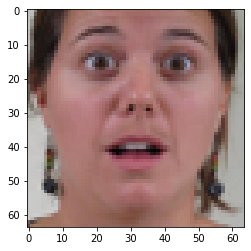

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import layers
import tensorflow as tf
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#on sépare la base d'image en train et en test
X_train_image, X_test_image, Y_train_image, Y_test_image = train_test_split(X_image_array, Y_image_array, test_size=0.30)

#on observe la taille des données de train et de test ainsi que quelques images
print(shape(X_train_image))
print(shape(Y_train_image))
print(Y_train_image[1])
print(shape(X_test_image))
print(shape(Y_test_image))
print(Y_test_image[1])
plt.imshow(X_train_image[1])

In [23]:
#les données sont déjà normalisées
#réseau de neurones simples pour la classification d'image
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train_image, Y_train_image, epochs=5)

Epoch 1/5
29/29 [==============================] - 4s 107ms/step - loss: 2.2121 - accuracy: 0.1678
Epoch 2/5
29/29 [==============================] - 3s 93ms/step - loss: 2.0222 - accuracy: 0.1989
Epoch 3/5
29/29 [==============================] - 3s 93ms/step - loss: 1.9453 - accuracy: 0.2367
Epoch 4/5
29/29 [==============================] - 3s 96ms/step - loss: 1.8418 - accuracy: 0.2667
Epoch 5/5
29/29 [==============================] - 3s 90ms/step - loss: 1.7963 - accuracy: 0.3233


### L'accuracy avec un ANN ne dépasse pas 32.33%, le modèle n'est pas assez complexe.
#### Passons à un CNN.

In [12]:
#on construit le modèle CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Nous pouvons lancer la cellule ci-dessous plusieurs fois pour multiplier les entraînements.

In [14]:
cnn.fit(X_train_image, Y_train_image, epochs=10)

Epoch 1/10
29/29 [==============================] - 2s 51ms/step - loss: 2.0963 - accuracy: 0.1344
Epoch 2/10
29/29 [==============================] - 1s 48ms/step - loss: 1.7449 - accuracy: 0.3867
Epoch 3/10
29/29 [==============================] - 1s 50ms/step - loss: 1.2167 - accuracy: 0.5656
Epoch 4/10
29/29 [==============================] - 1s 49ms/step - loss: 0.8364 - accuracy: 0.7111
Epoch 5/10
29/29 [==============================] - 1s 50ms/step - loss: 0.6976 - accuracy: 0.7311
Epoch 6/10
29/29 [==============================] - 1s 50ms/step - loss: 0.6415 - accuracy: 0.7667
Epoch 7/10
29/29 [==============================] - 1s 50ms/step - loss: 0.5388 - accuracy: 0.8044
Epoch 8/10
29/29 [==============================] - 1s 50ms/step - loss: 0.4575 - accuracy: 0.8256
Epoch 9/10
29/29 [==============================] - 1s 49ms/step - loss: 0.4972 - accuracy: 0.8178
Epoch 10/10
29/29 [==============================] - 1s 50ms/step - loss: 0.3856 - accuracy: 0.8589


In [15]:
cnn.evaluate(X_test_image, Y_test_image)

13/13 [==============================] - 0s 12ms/step - loss: 0.7721 - accuracy: 0.7098


[0.772092342376709, 0.7098445892333984]

### Nous arrivons à une accuracy finale en test à 72.5%.
### Nous pouvons désormais prédire les labels en les extraire en format csv.

In [16]:
#récupérer predict (label seulement) en .csv
Y_pred_image = cnn.predict(X_test_image)

In [17]:
#on extrait les labels prédits et on compare aux labels de base
label_predits = [np.argmax(element) for element in Y_pred_image]
print("Les labels prédits par le modèle CNN :\n", label_predits)
print("\n")
print("Les labels que l'on doit trouver :\n", Y_test_image)

Les labels prédits par le modèle CNN :
 [1, 5, 7, 2, 7, 6, 7, 6, 7, 3, 7, 5, 1, 7, 2, 1, 8, 3, 2, 3, 2, 6, 3, 3, 1, 2, 8, 6, 3, 3, 2, 6, 3, 6, 6, 2, 7, 6, 7, 8, 3, 6, 8, 7, 8, 3, 6, 5, 1, 1, 1, 5, 1, 1, 8, 7, 7, 3, 8, 7, 5, 3, 5, 1, 3, 2, 1, 7, 7, 6, 1, 3, 7, 2, 1, 6, 3, 7, 3, 2, 3, 8, 3, 3, 7, 1, 2, 1, 8, 7, 1, 7, 3, 3, 1, 8, 1, 7, 5, 3, 7, 3, 2, 7, 3, 5, 2, 2, 7, 7, 2, 7, 1, 1, 1, 7, 5, 1, 6, 3, 2, 3, 6, 3, 3, 2, 1, 3, 1, 6, 3, 1, 1, 6, 2, 3, 5, 1, 8, 3, 1, 3, 3, 1, 7, 3, 2, 6, 3, 2, 8, 2, 7, 1, 7, 6, 8, 6, 1, 1, 5, 3, 8, 1, 5, 1, 2, 5, 2, 8, 2, 8, 7, 6, 1, 7, 6, 8, 5, 7, 8, 3, 8, 3, 1, 6, 7, 2, 8, 3, 8, 7, 7, 2, 2, 5, 2, 8, 3, 1, 3, 3, 6, 6, 2, 2, 2, 3, 8, 2, 7, 6, 6, 1, 1, 2, 7, 7, 1, 3, 6, 5, 5, 3, 1, 3, 3, 2, 1, 8, 1, 1, 5, 2, 3, 7, 2, 1, 1, 1, 5, 5, 1, 6, 2, 5, 6, 7, 6, 1, 7, 1, 2, 1, 3, 2, 1, 3, 3, 3, 6, 3, 6, 3, 2, 3, 6, 2, 5, 6, 3, 7, 6, 5, 1, 1, 2, 1, 7, 2, 6, 6, 6, 8, 3, 6, 3, 3, 7, 3, 7, 3, 3, 3, 3, 5, 5, 6, 7, 5, 7, 3, 1, 2, 3, 5, 2, 8, 7, 7, 3, 2, 7, 3, 1, 1, 3, 8, 1, 2,

In [18]:
#on extrait les labels prédits en .csv
from pathlib import Path  

df = pd.DataFrame (label_predits, columns = ['Labels predits']) #on convertit la liste en dataframe

#                                 ------ A CHANGER SELON VOTRE CONFIG ------
filepath = Path('C:/Users/sarah/OneDrive/Bureau/label.csv') #on crée le .csv sur le bureau 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index = False)

In [19]:
df

,Labels predits
0,1
1,5
2,7
3,2
4,7
...,...
381,7
382,5
383,7
384,8


## Nous pouvons désormais exécuter ce dernier modèle sur de nouvelles images.

In [20]:
dataframe_validation = pd.read_csv("C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Data Camp/data.csv", sep =",")

#Séparation des observations et des labels
X1 = dataframe_validation.iloc[:, 1:] #toutes les lignes de la 2ème colonne à la fin (on compte le 0)
X1 = np.array(X1)


In [21]:
dataframe_validation

,id,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,jjyupobaej,448.4,450.4,457.5,467.7,483.5,508.0,537.2,575.5,616.8,...,576.2,568.8,547.4,533.8,534.0,533.0,543.8,548.8,550.5,549.8
1,tmaocsuopy,405.9,408.9,419.3,434.3,454.0,478.1,499.5,526.9,562.4,...,577.5,568.5,543.5,534.2,535.6,534.1,540.9,551.3,553.6,551.6
2,exdcuqqybo,443.5,446.6,452.9,461.2,476.4,502.7,541.5,585.5,639.5,...,618.6,613.0,599.6,600.1,601.1,598.3,597.4,598.2,601.4,600.2
3,pkfaqwjwww,384.6,386.7,393.8,404.8,424.1,451.8,481.5,514.7,550.9,...,530.0,524.1,510.6,506.3,506.9,504.6,506.3,508.3,510.2,509.3
4,ktchxitjnt,359.3,361.7,365.5,372.0,387.9,414.5,446.0,482.3,524.3,...,573.9,567.2,552.8,557.2,559.0,556.4,553.0,556.2,558.2,556.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,oubyckrchr,478.8,478.9,481.5,485.8,496.6,515.7,540.6,569.6,605.6,...,555.3,541.1,514.2,521.0,523.8,521.9,518.5,538.8,540.8,537.8
314,geqqdscard,502.9,499.2,498.2,502.6,515.2,537.5,566.8,610.9,667.1,...,537.8,532.2,516.7,504.8,505.7,505.1,516.0,511.1,512.3,511.0
315,gjizzaqhzf,377.7,380.0,387.6,399.5,418.1,444.9,476.0,512.2,555.8,...,543.7,538.3,523.9,518.9,520.5,518.4,524.2,518.6,520.8,518.7
316,smzczoktql,448.8,451.9,455.0,460.6,474.4,500.7,535.2,577.7,624.0,...,569.3,556.3,527.7,521.1,522.6,520.2,526.2,548.0,550.9,549.2


In [22]:
X1

array([[448.4, 450.4, 457.5, ..., 548.8, 550.5, 549.8],
       [405.9, 408.9, 419.3, ..., 551.3, 553.6, 551.6],
       [443.5, 446.6, 452.9, ..., 598.2, 601.4, 600.2],
       ...,
       [377.7, 380. , 387.6, ..., 518.6, 520.8, 518.7],
       [448.8, 451.9, 455. , ..., 548. , 550.9, 549.2],
       [325.6, 326.8, 331.6, ..., 525.3, 529. , 526.5]])

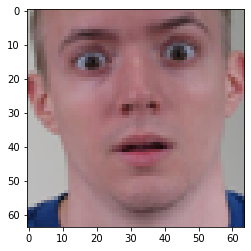

In [23]:
from IPython.display import display, Image
from PIL import Image

#redimension de l'image
def loadNewImage(file, left, right, up, down, dec):
  image = Image.open(file)
  image = image.crop((left-dec, up-dec, right+dec, down+dec))
  image = image.resize((64, 64))
  return(np.array(image))

listImage2 = [] #elle contient les 1286 observations/images
idImage = dataframe_validation["id"].values #on récupère le nom de l'image 
for i in range(len(idImage)):
    left, right, up, down = (dataframe_validation.loc[i, 'x_0'], dataframe_validation.loc[i, 'x_16'], dataframe_validation.loc[i, 'y_19'], dataframe_validation.loc[i, 'y_8'])
    fileToImage = str("C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Data Camp/images" + "/" + idImage[i] + ".jpg")
    #image = Image.open(fileToImage)
    image = loadNewImage(fileToImage, left, right, up, down, 40)
    listImage2.append(image)

listImage2 = np.array(listImage2) / 255.0 #on normalise
plt.imshow(listImage2[13]) #on peut choisir l'image à afficher ou boucler pour toutes les afficher
plt.show()

X_image_array2 = np.copy(listImage2)

In [24]:
#on garde notre modèle mais on prédit sur notre nouvelle liste d'image
Y_pred_image_2 = cnn.predict(X_image_array2)

In [25]:
#on extrait les labels prédits
label_predits_2 = [np.argmax(element) for element in Y_pred_image_2]
print("Les labels prédits par le modèle CNN :\n", label_predits_2)

Les labels prédits par le modèle CNN :
 [7, 6, 3, 1, 1, 3, 2, 3, 2, 5, 3, 7, 2, 6, 5, 1, 3, 2, 2, 1, 6, 1, 5, 1, 2, 8, 1, 2, 6, 7, 1, 6, 6, 2, 1, 3, 2, 8, 8, 7, 8, 1, 6, 3, 3, 8, 5, 2, 6, 1, 6, 2, 8, 1, 1, 2, 8, 5, 7, 3, 5, 8, 3, 8, 6, 8, 8, 3, 6, 8, 2, 2, 6, 3, 7, 2, 7, 5, 3, 6, 8, 6, 6, 6, 3, 6, 8, 2, 2, 6, 8, 2, 7, 3, 6, 2, 1, 2, 1, 1, 3, 1, 7, 6, 7, 6, 7, 1, 2, 2, 3, 3, 7, 7, 2, 8, 3, 1, 2, 5, 5, 6, 8, 6, 6, 2, 8, 5, 7, 1, 2, 7, 6, 8, 5, 5, 1, 7, 3, 2, 1, 8, 2, 6, 7, 2, 5, 8, 3, 2, 6, 1, 3, 8, 2, 8, 1, 7, 6, 7, 6, 1, 8, 2, 1, 3, 6, 1, 7, 1, 2, 6, 1, 2, 6, 3, 8, 1, 1, 5, 5, 7, 3, 2, 5, 6, 7, 2, 2, 1, 5, 7, 5, 6, 6, 5, 2, 1, 7, 7, 1, 3, 3, 8, 7, 6, 5, 1, 6, 8, 5, 3, 8, 6, 6, 5, 6, 1, 2, 2, 2, 8, 1, 2, 1, 3, 2, 7, 1, 6, 2, 2, 3, 3, 1, 5, 7, 1, 7, 1, 1, 3, 6, 3, 1, 6, 1, 6, 7, 7, 3, 7, 8, 6, 3, 1, 3, 3, 3, 3, 8, 3, 5, 6, 8, 1, 8, 5, 8, 5, 1, 3, 7, 7, 1, 2, 8, 6, 3, 2, 6, 1, 6, 3, 1, 5, 2, 6, 3, 7, 1, 3, 2, 2, 8, 6, 8, 3, 2, 2, 1, 3, 1, 1, 6, 1, 2, 6, 2, 3, 1, 7, 8, 2, 5, 5, 2, 2]


In [32]:
(unique, count) = np.unique(label_predits_2, return_counts=True)
for i in range (len(np.unique(label_predits_2))):
  print("Nombre d'exemple dans la base de données pour la classe {} : {}".format(unique[i], count[i]))

Nombre d'exemple dans la base de données pour la classe 1 : 57
Nombre d'exemple dans la base de données pour la classe 2 : 57
Nombre d'exemple dans la base de données pour la classe 3 : 48
Nombre d'exemple dans la base de données pour la classe 5 : 29
Nombre d'exemple dans la base de données pour la classe 6 : 53
Nombre d'exemple dans la base de données pour la classe 7 : 36
Nombre d'exemple dans la base de données pour la classe 8 : 38


In [33]:
len(label_predits_2)

318

In [27]:
#on extrait les labels prédits en .csv
from pathlib import Path  

df2 = pd.DataFrame(label_predits_2, columns = ['Labels predits']) #on convertit la liste en dataframe

#                                 ------ A CHANGER SELON VOTRE CONFIG ------
filepath = Path('C:/Users/sarah/OneDrive/Bureau/label.csv') #on crée le .csv sur le bureau 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df2.to_csv(filepath, index = False)